# 独立同分布

## 基本概念

**多维数据集中的每个特征（或变量）都可以视为一组随机变量。例如，在一个有𝑛个样本和𝑝个特征的数据集中，可以把它看成有𝑝组随机变量，每组包含𝑛个观测值**。

例如，假设一个数据集记录了多个个体的身高、体重和年龄三个特征，那么：

每个特征（身高、体重、年龄）可以看成是一组随机变量，描述的是不同个体的取值。  
每一组（或列）数据都对应一个随机变量集，表示在该特征上的不同观测。  
如果这些特征之间相互独立，并且每个特征的取值在个体间遵循相同的分布（i.i.d.），则我们可以进行进一步的独立性和同分布分析。不过，在实际中，多维数据集的特征之间常常存在相关性，不一定完全符合 i.i.d. 的假设。

满足 i.i.d. 假设在统计学和机器学习中很重要，因为它为许多理论和方法提供了数学上的合理性和简化。以下是需要满足 i.i.d. 假设的几个主要原因：

1. 便于进行概率推断  
i.i.d. 假设简化了样本均值和样本方差等统计量的推导和计算。当每个观测都是独立同分布时，我们可以更容易地分析样本统计量的分布特征，进而得到总体的估计。

2. 大数定律  
**大数定律告诉我们，在 i.i.d. 条件下，当样本量趋于无穷大时，样本均值会收敛于总体均值。这个定理使得我们可以用有限样本来估计总体均值，从而开展统计推断。**

3. 中心极限定理  
**中心极限定理指出，当样本是 i.i.d. 时，样本均值的分布会趋近于正态分布。这为假设检验和区间估计提供了理论基础。即使样本原本不是正态分布，中心极限定理也保证了样本均值的近似正态性，这在实践中十分有用。（中心极限定理之所以重要，是因为它表明即使数据本身不是正态分布，只要样本量足够大，样本均值的分布也可以近似为正态分布，从而可以使用大量基于正态分布的方法进行分析。）**

4. 提高模型的准确性与泛化能力  
在机器学习中，如果训练数据满足 i.i.d. 假设，模型会对未知数据表现更稳定。i.i.d. 假设帮助我们确保模型不会因为数据之间的相互关联性而导致过拟合，使模型能够更好地泛化到新数据。

5. 简化计算与理论证明  
i.i.d. 假设简化了很多统计方法的计算和证明过程。许多统计估计量（如最大似然估计、最小二乘估计）以及相关的置信区间和检验方法的理论推导，都依赖 i.i.d. 假设才能成立或简化。

6. 数据生成的合理性假设  
在一些实际应用中，i.i.d. 假设对应了真实的数据生成过程。例如，如果样本来自同一总体并且数据采集过程独立，那么 i.i.d. 假设是合理的，有助于理解数据的来源和性质。

## 使用场景

在机器学习中，许多方法和模型都隐含地假设数据是独立同分布（i.i.d.）的。这个假设对于模型的训练和评估至关重要，因为它影响了模型的泛化能力、稳定性和理论支持。以下是一些主要的机器学习方法，它们通常需要或假设数据满足 i.i.d. 条件：

1. **监督学习方法**  
在监督学习中，i.i.d. 假设非常普遍。模型通常假设训练和测试数据是从相同的总体分布中独立抽取的，这样模型在训练时学到的规律才可以推广到测试数据。这一假设适用于大多数监督学习方法，包括：  
线性回归和逻辑回归：这些模型的估计过程依赖于 i.i.d. 假设，这样可以更好地推断输入和输出之间的关系。  
支持向量机（SVM）：SVM 假设训练数据独立同分布，以便在高维空间中找到最优的分类边界。  
决策树和随机森林：决策树基于条件概率分布做出决策，且假设样本独立同分布。随机森林在生成多个决策树时也假设每棵树训练的数据是 i.i.d. 样本。    
2. **神经网络和深度学习**  
深度学习模型（如卷积神经网络、循环神经网络、全连接神经网络）通常假设数据集是独立同分布的，以确保模型在训练中学到的特征可以推广到新的样本。神经网络通过大量的随机梯度下降迭代来学习参数，i.i.d. 假设在一定程度上保证了梯度的稳定更新。

3. **朴素贝叶斯**  
朴素贝叶斯分类器假设特征之间相互独立，虽然不要求样本独立，但通常假设样本来自相同分布，从而能通过贝叶斯公式对类别概率进行有效估计。

4. **集成学习方法**  
Bagging（如随机森林）：在随机森林等方法中，数据的 i.i.d. 假设确保每棵树都能学到稳定的规律，从而在集成后提升泛化性能。
Boosting（如 AdaBoost、XGBoost）：Boosting 方法会逐步改进模型，但它们仍然需要每轮采样的数据服从同一分布，以保证模型的稳定提升。
5. **无监督学习方法**  
聚类（如 K-means、层次聚类）：这些方法通常假设数据点是独立同分布的，从而使得距离度量和聚类过程能够有效执行。
主成分分析（PCA）：PCA 假设数据服从相同分布，以便利用数据的协方差结构对特征降维。
6. **概率图模型**  
隐马尔可夫模型（HMM）：虽然 HMM 本身处理时间序列数据，但其初始状态概率往往假设是 i.i.d. 的，且观测序列在给定隐变量序列时被认为是独立同分布的。
马尔可夫链蒙特卡罗（MCMC）：在许多贝叶斯学习过程中，MCMC 用于样本采样，假设样本独立同分布，从而确保算法收敛并能够逼近真实分布。

# 相似性方法

## 欧几里德距离

## 余弦相似度

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
df = [
    [1, 0, 1, 1, 0],
    [1, 0, 0, 1, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 1],
    [1, 1, 1, 0, 1],
]
r = cosine_similarity(df,df)
r

array([[1.        , 0.66666667, 0.81649658, 0.33333333, 0.57735027],
       [0.66666667, 1.        , 0.40824829, 0.66666667, 0.57735027],
       [0.81649658, 0.40824829, 1.        , 0.        , 0.70710678],
       [0.33333333, 0.66666667, 0.        , 1.        , 0.57735027],
       [0.57735027, 0.57735027, 0.70710678, 0.57735027, 1.        ]])

# 层次分析法

AHP（层次分析法）

　　层次分析法（The analytic hierarchy process）简称AHP，在20世纪70年代中期由美国运筹学家托马斯·塞蒂（TLsaaty）正式提出。它是一种定性和定量相结合的、系统化、层次化的分析方法。由于它在处理复杂的决策问题上的实用性和有效性，很快在世界范围得到重视。它的应用已遍及经济计划和管理、能源政策和分配、行为科学、军事指挥、运输、农业、教育、人才、医疗和环境等领域。

层次分析法的基本步骤  
1、建立层次结构模型。在深入分析实际问题的基础上，将有关的各个因素按照不同属性自上而下地分解成若干层次，同一层的诸因素从属于上一层的因素或对上层因素有影响，同时又支配下一层的因素或受到下层因素的作用。最上层为目标层，通常只有1个因素，最下层通常为方案或对象层，中间可以有一个或几个层          次，通常为准则或指标层。当准则过多时(譬如多于9个)应进一步分解出子准则层。

2、构造成对比较阵。从层次结构模型的第2层开始，对于从属于(或影响)上一层每个因素的同一层诸因素，用成对比较法和1—9比较尺度构造成对比较阵，直到最下层。

3、计算权向量并做一致性检验。对于每一个成对比较阵计算最大特征根及对应特征向量，利用一致性指标、随机一致性指标和一致性比率做一致性检验。若检验通过，特征向量(归一化后)即为权向量：若不通过，需重新构造成对比较阵。

4、计算组合权向量并做组合一致性检验。计算最下层对目标的组合权向量，并根据公式做组合一致性检验，若检验通过，则可按照组合权向量表示的结果进行决策，否则需要重新考虑模型或重新构造那些一致性比率较大的成对比较阵。

运用AHP法进行决策时，需要经历以下4个步骤：

　　1、建立系统的递阶层次结构；

　　2、构造两两比较判断矩阵；（正互反矩阵）

　　3、针对某一个标准，计算各备选元素的权重；

　　4、计算当前一层元素关于总目标的排序权重。

　　5、进行一致性检验。

模型  
    对三个干部候选人y 1、y 2、y 3，按选拔干部的五个标准：品德、才能、资历、年龄和群众关系，构成如下层次分析模型：假设有三个干部候选人y 1、y 2、y 3，按选拔干部的五个标准：品德，才能，资历，年龄和群众关系，构成如下层次分析模型
    
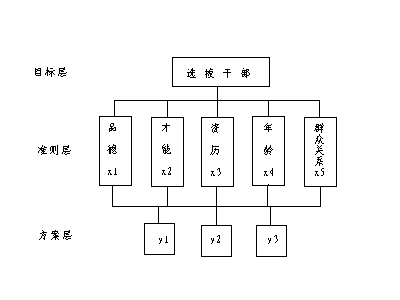

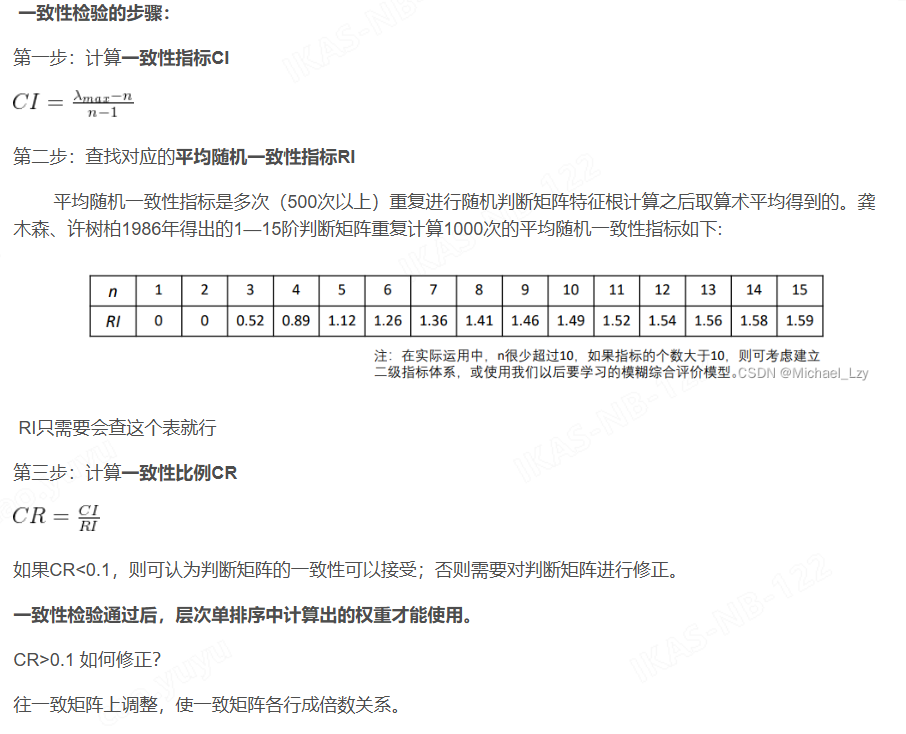

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

RI_dict = {
    1: 0,
    2: 0,
    3: 0.58,
    4: 0.90,
    5: 1.12,
    6: 1.24,
    7: 1.32,
    8: 1.41,
    9: 1.45
}


def get_w(array):
    row = array.shape[0]  # 计算出阶数
    a_axis_0_sum = array.sum(axis=0)
    # print(a_axis_0_sum)
    b = array / a_axis_0_sum  # 新的矩阵b
    # print(b)
    b_axis_0_sum = b.sum(axis=0)
    b_axis_1_sum = b.sum(axis=1)  # 每一行的特征向量
    # print(b_axis_1_sum)
    w = b_axis_1_sum / row  # 归一化处理(特征向量)
    nw = w * row
    AW = (w * array).sum(axis=1)
    # print(AW)
    max_max = sum(AW / (row * w))
    # print(max_max)
    CI = (max_max - row) / (row - 1)
    CR = CI / RI_dict[row]
    if CR < 0.1:
        # print(round(CR, 3))
        # print('满足一致性')
        # print(np.max(w))
        # print(sorted(w,reverse=True))
        # print(max_max)
        # print('特征向量:%s' % w)
        return w
    else:
        print(round(CR, 3))
        print('不满足一致性，请进行修改')


def main(array):
    if type(array) is np.ndarray:
        return get_w(array)
    else:
        print('请输入numpy对象')


if __name__ == '__main__':
    e = np.array([[1, 2, 7, 5, 5], [1 / 2, 1, 4, 3, 3],
                  [1 / 7, 1 / 4, 1, 1 / 2, 1 / 3], [1 / 5, 1 / 3, 2, 1, 1],
                  [1 / 5, 1 / 3, 3, 1, 1]])
    a = np.array([[1, 1 / 3, 1 / 8], [3, 1, 1 / 3], [8, 3, 1]])
    b = np.array([[1, 2, 5], [1 / 2, 1, 2], [1 / 5, 1 / 2, 1]])
    c = np.array([[1, 1, 3], [1, 1, 3], [1 / 3, 1 / 3, 1]])
    d = np.array([[1, 3, 4], [1 / 3, 1, 1], [1 / 4, 1, 1]])
    f = np.array([[1, 4, 1 / 2], [1 / 4, 1, 1 / 4], [2, 4, 1]])
    e = main(e)
    a = main(a)
    b = main(b)
    c = main(c)
    d = main(d)
    f = main(f)
    try:
        res = np.array([a, b, c, d, f])
        ret = (np.transpose(res) * e).sum(axis=1)
        print(ret)
    except TypeError:
        print('数据有误，可能不满足一致性，请进行修改')

[0.31878206 0.23919592 0.44202202]


# 假设检验

## 正态分布检验

多维数据集中的每个特征（即每一列变量），都可以分别进行正态性检验，以判断该特征是否符合正态分布。

例如，假设有一个包含多个特征的数据集，可以对每个特征单独使用正态性检验（如Shapiro-Wilk检验、Kolmogorov-Smirnov检验等），这样可以了解每个特征的分布情况。不同的特征可能符合不同的分布，因此对每个特征单独检验更合理。

### Shapiro-Wilk Test (W检验)

Shapiro-Wilk检验，用于检验样本数据是否来自服从正态分布的总体。 在实际应用中，W 检验被认为是一个可靠的正态性检验，但是也有人认为该检验更适用于较小的数据样本（数千个观测值以内）。Shapiro-Wilk 检验统计量stat：用于检验数据的正态性程度，数值越接近 1，样本越符合正态分布。

使用前提：各样本观察值为独立同分布(iid)的。

原假设H0：样本数据服从正态分布

结果解释：当p值小于某个显著性水平α(如0.05)，则认为样本不是来自正态分布的总体，否则承认样本来自正态分布的总体。

In [1]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，样本数据服从正态分布')
else:
    print('不服从正态分布')

stat=0.895, p=0.193
不能拒绝原假设，样本数据服从正态分布


### D'Agostino's K2 Test (normal Test)

D'Agostino's K2检验，用于检验样本数据是否来自服从正态分布的总体。是通过计算样本数据的峰度和偏度，来判断其分布是否偏离正态分布。偏度是对数据分布对称性的测度，衡量数据分布是否左偏或右偏。峰度是对数据分布平峰或尖峰程度的测度，它是一种简单而常用的正态性统计检验量。

使用前提：各样本观察值为独立同分布(iid)的。

原假设H0：样本数据服从正态分布。

结果解释：当p值小于某个显著性水平α(如0.05)，则认为样本不是来自正态分布的总体，否则承认样本来自正态分布的总体。

In [2]:
# D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，样本数据服从正态分布')
else:
    print('不服从正态分布')

stat=3.392, p=0.183
不能拒绝原假设，样本数据服从正态分布


D:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Anderson-Darling Test

Anderson检验，用于检验样本数据是否服从某一已知分布。该检验修改自一种更复杂的非参数的拟合良好的检验统计（Kolmogorov-Smirnov Test）。SciPy中的anderson()函数实现了Anderson-Darling检验，函数参数为样本数据及要检验的分布名称，默认情况下，为'norm'正态分布，还支持对'expon'指数分布，'logistic'分布，以及'gumbel'耿贝尔分布的检验，它会返回一个包含不同显著性水平下的p值的列表，而不是一个单一的p值，因此这可以更全面地解释结果。

使用前提：各样本观察值为独立同分布的。

原假设H0：样本数据服从某一已知分布。

结果解释：当p值小于某个显著性水平α(如0.05)，则认为样本不是来自正态分布的总体，否则承认样本来自正态分布的总体。

In [3]:
# Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))  # 统计量
print("临界值:",result.critical_values)   # P值
print("显著性水平:",result.significance_level) # 显著性水平
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:  #统计量小于临界值
        print('显著性水平为%.2f时，P值为%.1f,不能拒绝原假设，样本数据服从正态分布' % (sl/100, cv))
    else:
        print('显著性水平为%.2f时，P值为%.1f, 拒绝原假设，样本数据不服从正态分布' % (sl/100, cv))

stat=0.424
临界值: [0.501 0.57  0.684 0.798 0.95 ]
显著性水平: [15.  10.   5.   2.5  1. ]
显著性水平为0.15时，P值为0.5,不能拒绝原假设，样本数据服从正态分布
显著性水平为0.10时，P值为0.6,不能拒绝原假设，样本数据服从正态分布
显著性水平为0.05时，P值为0.7,不能拒绝原假设，样本数据服从正态分布
显著性水平为0.03时，P值为0.8,不能拒绝原假设，样本数据服从正态分布
显著性水平为0.01时，P值为0.9,不能拒绝原假设，样本数据服从正态分布


## 相关性检验

### Pearson 相关系数

Pearson相关系数，用于检验两样本数据之间线性关系的强度。该检验将两个变量之间的协方差进行归一化处理以给出可解释的分数，为一个介于-1到1之间的值，-1表示完全负相关，1表示完全正相关，0表示没有相关性。

使用前提：各样本观察值为独立同分布(iid)的、样本数据服从正态分布、每个样本观测值的方差相等、所有变量都是连续变量。

原假设H0：两变量相互独立(或不相关)。

结果解释：当p值小于某个显著性水平α(比如0.05)时，则拒绝原假设，认为两个变量是相关的。否则认为是不相关的。这里的相关仅为统计学意义上的相关性，并不能理解为实际因果关系。

In [4]:
# Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('两变量相互独立')
else:
    print('两变量可能存在线性相关关系')

stat=0.688, p=0.028
两变量可能存在线性相关关系


### Spearman 相关系数

Spearman相关，用于检验两变量是否具有单调关系。当两变量因非线性关系相关，或者不服从正态分布时，Spearman相关系数可以用来反映变量间的相关性强度。如果存在线性关系，也可以使用这种方法来检验，但是可能导致计算出的相关系数较低。Spearman不是使用样本数据本身的协方差和标准差来计算相关系数的，而是根据样本值的相对秩次来计算统计量，这是非参数统计中常用的方法。

使用前提：各样本观察值为独立同分布(iid)的，各样本数据是连续变量，或可排序定序的分类变量。

原假设：两变量相互独立。

结果解释：当p值小于某个显著性水平α(比如0.05)时，则则拒绝原假设，认为两个变量是相关的。否则认为是不相关的。

In [5]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('两变量相互独立')
else:
    print('两变量可能存在相关关系')

stat=0.855, p=0.002
两变量可能存在相关关系


### kendalltau相关系数

用于检验两变量是否具有单调关系。

使用前提:各样本观察值为独立同分布的、各样本数据可定序。

原假设H0：两变量相互独立。

结果解释：当p值小于某个显著性水平α(比如0.05)时，则则拒绝原假设，认为两个变量是相关的。否则认为是不相关的。

In [6]:
# Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('两变量相互独立')
else:
    print('两变量可能存在相关关系')

stat=0.733, p=0.002
两变量可能存在相关关系


## 参数检验

一般来说，我们先进行正态性分析，再进行方差齐性检验，然后再进行之后的检验。

### 方差齐性检验

方差齐性检验（homogeneity of variance test）用于检验多个样本数据的方差是否相等，即是否满足方差齐性假设。方差齐性是许多统计分析方法（如 t 检验、ANOVA 等）的前提条件之一，这些方法要求不同组别的数据方差相似，以确保分析结果的准确性。

**方差齐性检验的目的就是看我们拿到的两个样本的波动是否是一样的**。如果方差不一样，我们就无法比较这两个样本所代表的整体哪个更好。

方差分析 (ANOVA) 和回归等许多统计过程都假定：虽然不同样本可能来自均值不同的总体，但它们的方差都相同。

#### Levene 检验

**描述**：Levene 检验是最常用的方差齐性检验方法之一。它的优点是对数据的正态性要求较低。

**原理**：Levene 检验使用各组数据偏离各组中位数（或均值）的绝对值来计算方差，从而更鲁棒地估计方差的差异。

结果解读：若 p 值大于显著性水平（通常是 0.05），则接受原假设，认为数据满足方差齐性；若 p 值小于 0.05，则拒绝原假设，认为数据不满足方差齐性。

In [11]:
from scipy.stats import levene

# 示例数据
group1 = [10, 12, 14, 15, 18]
group2 = [30, 32, 31, 29, 35]
group3 = [50, 45, 49, 52, 51]

# Levene 检验
stat, p_value = levene(group1, group2, group3)
print('Levene检验统计量:', stat)
print('p-value:', p_value)

Levene检验统计量: 0.1521739130434783
p-value: 0.8604702889744789


#### Bartlett 检验

描述：Bartlett 检验假设数据来自正态分布，因此对正态性要求较高。如果数据不是正态分布，Bartlett 检验的结果可能不可靠。

原理：Bartlett 检验基于样本方差的对数转换，用卡方分布的检验统计量来判断是否存在方差差异。

结果解读：若 p 值大于显著性水平，则数据满足方差齐性；若 p 值小于显著性水平，则数据不满足方差齐性。

In [12]:
from scipy.stats import bartlett

# 示例数据
group1 = [10, 12, 14, 15, 18]
group2 = [30, 32, 31, 29, 35]
group3 = [50, 45, 49, 52, 51]

stat, p_value = bartlett(group1, group2, group3)
print('Bartlett检验统计量:', stat)
print('p-value:', p_value)

Bartlett检验统计量: 0.2703902062081841
p-value: 0.8735454636295827


#### Brown-Forsythe 检验

描述：Brown-Forsythe 检验是 Levene 检验的改进版，通过使用各组数据的中位数替代均值计算偏差，因此对非正态数据也有较高的鲁棒性。

Brown-Forsythe 检验在 Python 中没有直接实现，但可以通过设置 Levene 检验的 center 参数为 'median' 来实现相同效果：

结果解读：若 p 值大于显著性水平，则数据满足方差齐性；若 p 值小于显著性水平，则数据不满足方差齐性。

In [14]:
stat, p_value = levene(group1, group2, group3, center='median')
print('Bartlett检验统计量:', stat)
print('p-value:', p_value)

Bartlett检验统计量: 0.1521739130434783
p-value: 0.8604702889744789


### 方差分析

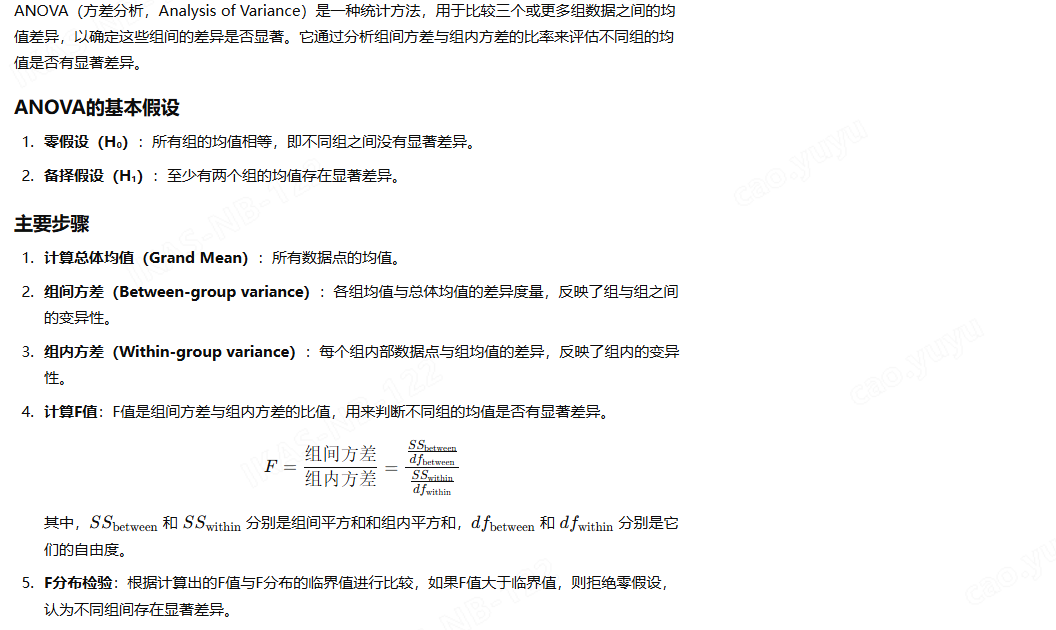

ANOVA类型
- 单因素ANOVA：比较一个因子（自变量）对一个因变量（因子水平）是否有显著影响。例如，比较不同教学方法对学生成绩的影响。

- 双因素ANOVA：同时考虑两个因子对因变量的影响，且可以评估两个因子之间是否存在交互作用。

- 多因素ANOVA：考虑多个因素的影响。

适用条件
- 数据应该服从正态分布。
- 各组的方差应该大致相等（方差齐性）。
- 数据独立性。

在方差分析（ANOVA）中，因素是指那些被用来划分数据组的分类变量，每个因素有多个水平（Levels），即它可以取的不同值或类别。

#### 单因素ANOVA

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 假设数据：教学方法 (Method) 和成绩
data = {
    'Score': [75, 80, 82, 85, 78, 84, 88, 90, 72, 79, 83, 86, 65, 70, 72, 74],
    'Method': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B']
}

# 创建DataFrame
df = pd.DataFrame(data)

# 使用statsmodels库进行单因素ANOVA
model = ols('Score ~ C(Method)', data=df).fit()
anova_result = anova_lm(model)

# 输出ANOVA表
print(anova_result)

             df    sum_sq    mean_sq         F    PR(>F)
C(Method)   1.0   27.5625  27.562500  0.530504  0.478402
Residual   14.0  727.3750  51.955357       NaN       NaN


- C(Method): 这是教学方法的主效应。p值为0.478402，大于0.05，接受原假设，说明教学方法对学生成绩没有显著影响。
- Residual: 这是误差项，表示在数据中未解释的变异。

#### 双因素ANOVA

双因素ANOVA会检验两个因素的主效应（单独因素的效应）以及它们的交互效应。

主效应：每个单独因素（如教学方法、性别）对因变量的影响。  
交互效应：因素组合的联合效应，例如教学方法与性别的组合对成绩的影响。  
在双因素ANOVA中，如果交互效应的p值小于显著性水平（通常为0.05），则表示存在显著的交互作用，说明两个因素的联合效应与单独效应的加和不同。

交互作用表示两个（或多个）因素的组合效应可能不是每个因素单独效应的简单加和。也就是说，一个因素的效果可能会因另一个因素的不同水平而发生变化。

示例说明  
假设我们有两个因素：  

- 教学方法（Method），有两个水平：方法A和方法B。
- 学生性别（Gender），有两个水平：男和女。  

我们想研究教学方法和学生性别对学生成绩的影响。如果这两个因素之间有交互作用，那么教学方法对成绩的影响可能会依赖于学生的性别。例如，方法A可能对男生有效，而方法B对女生有效，但对男生效果较差。这种效应就构成了交互作用。

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 假设数据：教学方法 (Method), 学生性别 (Gender) 和成绩
data = {
    'Score': [75, 80, 82, 85, 78, 84, 88, 90, 72, 79, 83, 86, 65, 70, 72, 74],
    'Method': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Gender': ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']
}

# 创建DataFrame
df = pd.DataFrame(data)

# 使用statsmodels库进行双因素ANOVA
model = ols('Score ~ C(Method) + C(Gender) + C(Method):C(Gender)', data=df).fit()
anova_result = anova_lm(model)

# 输出ANOVA表
print(anova_result)

                       df    sum_sq   mean_sq         F    PR(>F)
C(Method)             1.0   27.5625   27.5625  1.133676  0.307948
C(Gender)             1.0  232.5625  232.5625  9.565553  0.009313
C(Method):C(Gender)   1.0  203.0625  203.0625  8.352185  0.013576
Residual             12.0  291.7500   24.3125       NaN       NaN


- C(Method): 这是教学方法的主效应。p值为0.307948，说明教学方法对学生成绩没有显著影响。
- C(Gender): 这是学生性别的主效应。p值为0.009313，说明学生性别对成绩有显著影响。
- C(Method):C(Gender): 这是教学方法与学生性别的交互效应。p值为0.013576，说明交互效应显著，即教学方法对男女学生的影响有差异。

In [4]:
# 分开查看
anova_result['PR(>F)']

C(Method)              0.307948
C(Gender)              0.009313
C(Method):C(Gender)    0.013576
Residual                    NaN
Name: PR(>F), dtype: float64

#### 多因素ANOVA

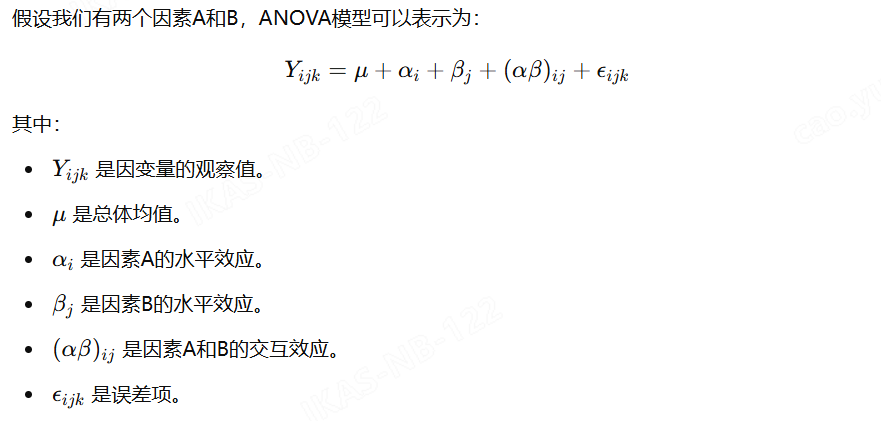

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 假设数据：教学方法 (Method), 性别 (Gender), 学习时间 (StudyTime) 和成绩 (Score)
data = {
    'Score': [75, 80, 82, 85, 78, 84, 88, 90, 72, 79, 83, 86, 65, 70, 72, 74, 
              77, 82, 86, 89, 81, 87, 91, 92, 70, 73, 79, 80, 76, 84, 88, 90],
    'Method': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 
               'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Gender': ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 
               'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F'],
    'StudyTime': ['Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 
                  'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 'Long', 
                  'Short', 'Short', 'Short', 'Short', 'Long', 'Long', 'Long', 'Long',
                  'Short', 'Short', 'Short', 'Short', 'Long', 'Long', 'Long', 'Long']
}

# 创建DataFrame
df = pd.DataFrame(data)

# 使用ols拟合模型，因变量是Score，自变量是Method、Gender和StudyTime，以及它们的交互效应
model = ols('Score ~ C(Method) + C(Gender) + C(StudyTime) + C(Method):C(Gender) + C(Method):C(StudyTime) + C(Gender):C(StudyTime) + C(Method):C(Gender):C(StudyTime)', data=df).fit()

# 使用anova_lm进行ANOVA分析
anova_result = anova_lm(model)

# 输出ANOVA表
print(anova_result)

                                    df       sum_sq    mean_sq         F  \
C(Method)                          1.0    32.000000  32.000000  0.615667   
C(Gender)                          1.0    24.000000  24.000000  0.461750   
C(StudyTime)                       1.0    17.396767  17.396767  0.334706   
C(Method):C(Gender)                1.0    22.836815  22.836815  0.439371   
C(Method):C(StudyTime)             1.0     0.986115   0.986115  0.018972   
C(Gender):C(StudyTime)             1.0    23.033653  23.033653  0.443158   
C(Method):C(Gender):C(StudyTime)   1.0    70.956293  70.956293  1.365169   
Residual                          28.0  1455.333333  51.976190       NaN   

                                    PR(>F)  
C(Method)                         0.439251  
C(Gender)                         0.502387  
C(StudyTime)                      0.567526  
C(Method):C(Gender)               0.512846  
C(Method):C(StudyTime)            0.891431  
C(Gender):C(StudyTime)            0.511050  


### 卡方检验

Chi-Squared检验，用于检验两分类变量是否相关，属于非参数检验的范畴。卡方检验的零假设是一个分类变量的实际观测频数与该分类变量的理论期望频数相吻合。检验统计量服从卡方分布。实际观测值与理论推断值之间的偏离程度就决定卡方值的大小，如果卡方值越大，二者偏差程度越大；反之二者偏差越小；若两个值完全相等时，卡方值就为0，表明理论值完全符合。

使用前提：仅仅针对分类变量、用于计算两变量的列联表的观测值是独立(iid)的、列联表的每个单元格的期望计数不小于5。

原假设H0：两变量相互独立。

结果解释：当p值小于某个显著性水平α(比如0.05)时，则拒绝原假设，认为两个样本有显著差异。

In [7]:
# Chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# 列联表
table = [[10, 20, 30],
        [6,  9,  17]]
print('列联表')
print(table)

stat, p, dof, expected = chi2_contingency(table)
print('自由度dof=%d' % dof)
print('期望分布')
print(expected)

# [[10.43478261 18.91304348 30.65217391]
#  [ 5.56521739 10.08695652 16.34782609]]

# 采用统计量推断
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('拒绝原假设，两变量存在相关关系')
else:
    print('不能拒绝原假设，两变量相互独立')

# 采用p值推断
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('拒绝原假设，两变量存在相关关系')
else:
    print('不能拒绝原假设，两变量相互独立')

列联表
[[10, 20, 30], [6, 9, 17]]
自由度dof=2
期望分布
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
不能拒绝原假设，两变量相互独立
significance=0.050, p=0.873
不能拒绝原假设，两变量相互独立


### 单变量t检验

#### 单样本t检验

用于检验某样本与特定均值是否存在显著差异。

单样本t检验是样本均值与总体均值的比较问题。其中总体服从正态分布，从正态总体中抽样得到n个个体组成抽样样本，计算抽样样本均值和标准差，判断总体均值与抽样样本均值是否相同。

使用前提：样本数据服从正态或近似正态分布、每个样本中的观察是独立同分布(iid)、t检验属于参数检验，用于检验定量数据，若数据均为定类数据则应使用卡方检验。

原假设H0：样本均值无差异(μ=μ0)

结果解释：当p值小于某个显著性水平α(比如0.05)时，则认为样本均值存在显著差异，具体的分析要看所选择的是双边假设还是单边假设（又分小于和大于）注意ttest_1samp进行双侧检验。

In [9]:
from scipy.stats import ttest_1samp
data = [23,20,18,29,43,35,32,40,29,26,24,26]
ttest_1samp(data, 1)

TtestResult(statistic=12.580499841236527, pvalue=7.147688035833005e-08, df=11)

#### 独立样本t检验

用于检验两独立样本数据的均值是否存在显著差异。

使用前提：各样本观察值为独立同分布(iid)的、样本数据服从或近似服从正态分布、每个样本观测值的方差相等、T检验属于参数检验，用于检验定量数据，若数据均为定类数据则应使用卡方检验。

原假设H0：两样本集的均值相同。

注意：**当不确定两总体方差是否相等时，应先利用levene检验，检验两总体是否具有方差齐性stats.levene(data1,data2)如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。如果两总体不具有方差齐性，需要加上参数equal_val并设定为False**。

结果解释：当p值小于某个显著性水平α(比如0.05)时，则认为样本均值存在显著差异，具体的分析要看所选择的是双边假设还是单边假设（又分小于和大于）注意stats.ttest_ind进行双侧检验。

In [10]:
# Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，两样本集分布相同')
else:
    print('拒绝原假设，样本集分布可能不同')

stat=-0.326, p=0.748
不能拒绝原假设，两样本集分布相同


#### 配对样本t检验

用于检验两配对样本的均值是否存在显著差异。

使用前提：各样本观察值为独立同分布的(iid)、样本数据服从正态分布、每个样本观测值的方差相等、样本的数据是一一对应的关系(成对)，数量相同。

原假设H0：各样本集的均值相同。

结果解释：当p值小于某个显著性水平α(比如0.05)时，则认为样本均值存在显著差异，具体的分析要看所选择的是双边假设还是单边假设（又分小于和大于）注意stats.ttest_rel进行双侧检验。

In [15]:
# Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，两样本集分布相同')
else:
    print('拒绝原假设，两样本集分布可能不同')

stat=-0.334, p=0.746
不能拒绝原假设，两样本集分布相同


### 多变量t检验

#### Hotelling $T^2$ 检验

Hotelling $T^2$ 检验(霍特林)是 独立样本 和 配对样本 t-检验的多元扩展，特别适用于同时考虑多个变量的情况。

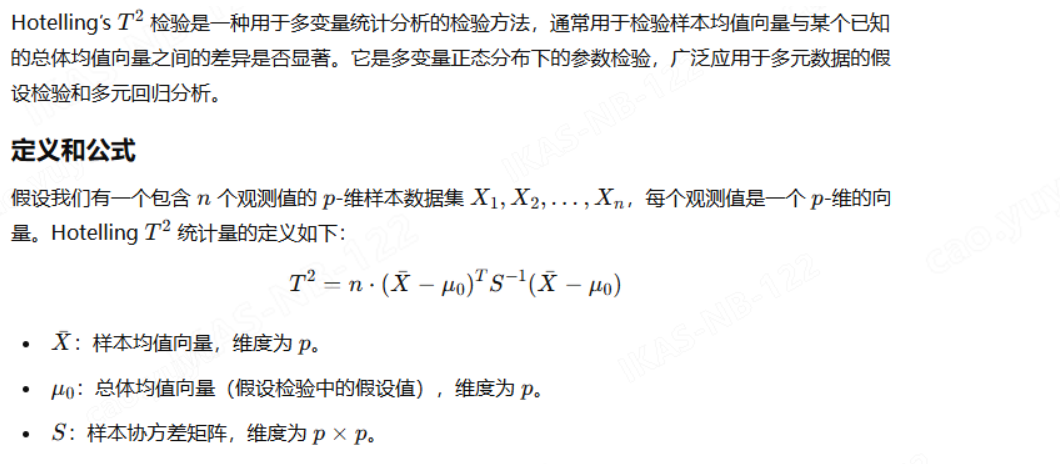

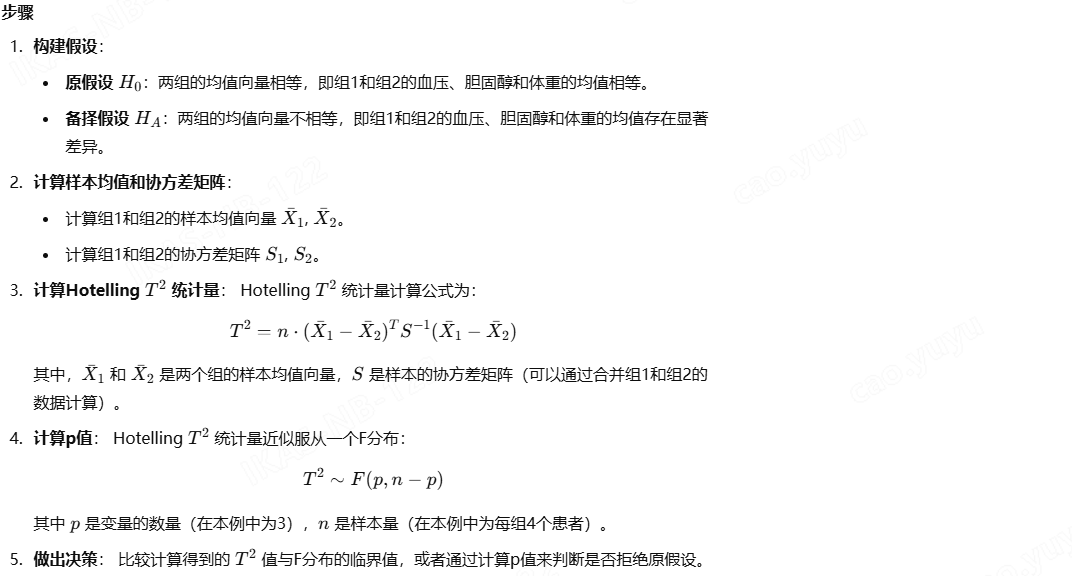

In [6]:
import numpy as np
from scipy.linalg import inv
from scipy.stats import f

# 数据：组1和组2的健康指标（血压、胆固醇、体重）
group1 = np.array([[120, 200, 75],
                   [125, 195, 78],
                   [118, 210, 80],
                   [130, 205, 82]])

group2 = np.array([[135, 220, 85],
                   [140, 215, 88],
                   [128, 230, 90],
                   [138, 225, 92]])

# 计算样本均值向量
mean_group1 = np.mean(group1, axis=0)
mean_group2 = np.mean(group2, axis=0)

# 计算样本协方差矩阵
cov_group1 = np.cov(group1, rowvar=False)
cov_group2 = np.cov(group2, rowvar=False)

# 合并协方差矩阵
pooled_cov = (cov_group1 + cov_group2) / 2

# 计算Hotelling T^2 统计量
n1 = len(group1)
n2 = len(group2)
diff = mean_group1 - mean_group2
t2 = n1 * n2 * np.dot(np.dot(diff, inv(pooled_cov)), diff.T) / (n1 + n2)

# 计算p值（T^2 统计量近似服从F分布）
p = len(mean_group1)  # 变量个数（血压、胆固醇、体重）
dfn = p  # F分布的分子自由度
dfd = n1 + n2 - p - 1  # F分布的分母自由度

# 查找p值
p_value = 1 - f.cdf(t2 * (n1 + n2 - p - 1) / (n1 * n2), dfn, dfd)

# 输出结果
print(f"Hotelling T^2 统计量: {t2}")
print(f"p值: {p_value}")

if p_value < 0.05:
    print("拒绝原假设：两组均值差异显著")
else:
    print("无法拒绝原假设：两组均值差异不显著")

Hotelling T^2 统计量: 76.63067206100644
p值: 0.00776440776641385
拒绝原假设：两组均值差异显著


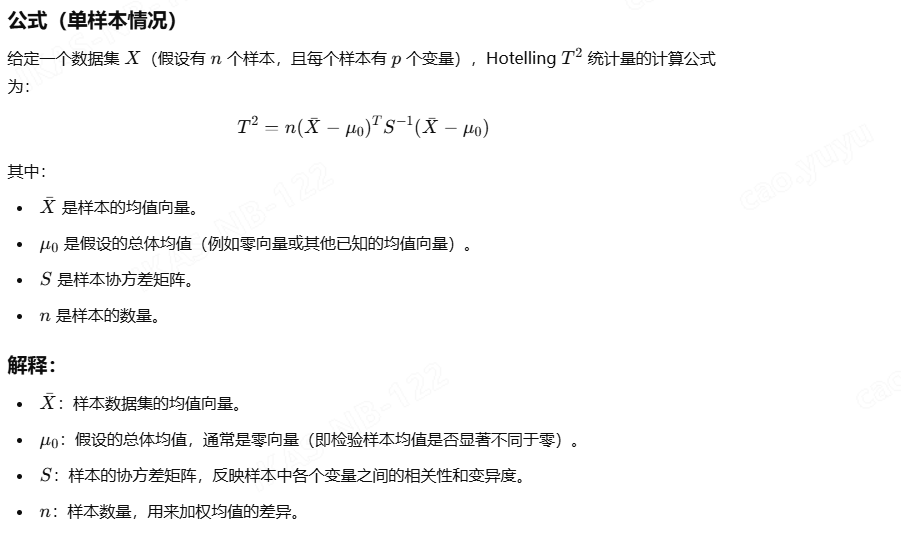

In [1]:
import numpy as np
from scipy.linalg import inv
from scipy.stats import f

# 示例数据：血压、胆固醇、体重（每行是一个样本）
data = np.array([
    [122, 198, 72],
    [125, 202, 75],
    [118, 199, 70],
    [130, 210, 80],
    [121, 205, 76],
    [123, 207, 74],
    [127, 212, 79],
    [119, 198, 71],
    [126, 211, 78],
    [124, 208, 77]
])

# 假设的总体均值
mu_0 = np.array([120, 200, 70])

# 计算样本均值向量
mean_sample = np.mean(data, axis=0)

# 计算样本协方差矩阵
cov_matrix = np.cov(data, rowvar=False)

# 计算 Hotelling T^2 统计量
n = len(data)  # 样本数量
diff = mean_sample - mu_0  # 样本均值与总体均值的差异
T2 = n * np.dot(np.dot(diff, inv(cov_matrix)), diff.T)

# 计算 p 值
p = len(mu_0)  # 变量数量（3个变量：血压、胆固醇、体重）
dfn = p  # F 分布的分子自由度
dfd = n - p  # F 分布的分母自由度

# 计算 p 值
p_value = 1 - f.cdf(T2 * (n - p) / (n * p), dfn, dfd)

# 输出结果
print(f"Hotelling T^2 统计量: {T2}")
print(f"p 值: {p_value}")

# 判断是否拒绝原假设
alpha = 0.05  # 显著性水平
if p_value < alpha:
    print("拒绝原假设：样本均值与总体均值有显著差异")
else:
    print("无法拒绝原假设：样本均值与总体均值没有显著差异")

Hotelling T^2 统计量: 55.24655846213427
p 值: 0.003079333055186928
拒绝原假设：样本均值与总体均值有显著差异


## 非参数检验

### Mann-Whitney U Test (曼惠特尼U检验)

用于检验两独立样本分布是否相同。该检验的原理是，将两样本合并起来，一起排序，然后计算两样本的值是随机混合排序的，还是聚集的。秩序随机则代表两样本集分布无差异，而出现样本值聚集情况则表明有差异。为了使检验有效，要求每个样本数据至少有20个观测值。

使用前提：各样本观察值为独立同分布的，各样本集中数据可定序。

原假设H0：两样本集分布相同。

In [16]:
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169,]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，两样本集分布相同')
else:
    print('拒绝原假设，样本集分布可能不同')

stat=40.000, p=0.473
不能拒绝原假设，两样本集分布相同


### Wilcoxon Signed-Rank Test

用于检验两配对样本分布是否相同。样本不独立，因此不能使用Mann-Whitney U检验，而是使用Wilcoxon符号秩检验。这相当于配对样本的学生t检验，但是适用于定序数据，而不是服从正态分布的实测数据。

使用前提：各样本观察值为独立同分布的，各样本集中数据可定序，样本的数据是一一对应的关系，与Mannwhitney不同的是，该检验需要样本数量相同，即配对。

原假设H0：两样本集分布相同。

In [17]:
# Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169,]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，两样本集分布相同')
else:
    print('拒绝原假设，样本集分布可能不同')

stat=21.000, p=0.557
不能拒绝原假设，两样本集分布相同


### Kruskal-Wallis H Test

用于检验两个及以上独立样本的分布是否相同。Kruskal-Wallis 检验是单因素方差分析检验的非参数检验版本，可以用来确定两个以上的独立样本是否有不同的分布，可以被认为是Mann-Whitney U检验的一般化。该检验的零假设H0是“所有样本数据从同一个分布中抽取的”，若拒绝原假设，则表明有足够证据证明至少有一个样本与其他样本不同，但是该假设并不能确定具体是哪几个不同。因此，如果需要确定，可再使用Mann-Whitney检验进行两两对比。

使用前提：各样本观察值为独立同分布的，各样本集中数据可定序。

原假设H0：各样本集的分布相同。

备择假设H1：至少有一个样本集与其他样本不同。

In [18]:
# Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = kruskal(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，样本集分布相同')
else:
    print('拒绝原假设，样本集分布可能不同')

stat=0.854, p=0.652
不能拒绝原假设，样本集分布相同


### Friedman Test (弗里德曼检验)

用于检验两个及以上配对样本的分布是否相同。Friedman Test是重复测量方差分析的非参数检验版本，需要每组至少有10个样本，当得出显著性结果，表明至少有一个样本与其他样本存在差异。

使用前提：各样本观察值为独立同分布的，各样本集中数据可定序，样本的数据是一一对应的关系，每组的样本数量需要相等。

原假设H0：各样本集的分布相同。

In [19]:
# Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204,]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('不能拒绝原假设，样本集分布相同')
else:
    print('拒绝原假设，样本集分布可能不同')

stat=0.800, p=0.670
不能拒绝原假设，样本集分布相同


### Kolmogorov-Smirnov Test

KS检验分为单样本和两样本检验，单样本检验用于检验一个数据的观测分布是否符合某种理论分布。两样本检验用于检验两个样本是否属于同一分布，KS检验是两样本检验最有用且最常用的非参数方法之一； ks 检验不仅能检验正态分布，还能检验其他分布。

KS 检验基于两个分布函数之间的最大差距来衡量两个分布的相似程度。假设有两个累积分布函数（CDF） 𝐹(𝑥)和 𝐺(𝑥)，KS 检验会计算它们之间的最大垂直距离𝐷，并根据𝐷值的大小来判断两者的差异是否显著。

原假设H0：样本服从某个分布。

In [25]:
from scipy.stats import kstest, norm, ks_2samp
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 300  # size of second sample
#For a different distribution, we can reject the null hypothesis since the pvalue is below 1%:

rvs1 = norm.rvs(size=n1, loc=0., scale=1)
rvs2 = norm.rvs(size=n2, loc=0.5, scale=1.5)
statistic, pvalue=ks_2samp(rvs1, rvs2)
print('stat=%.3f, p=%.3f' % (statistic, pvalue))
if pvalue > 0.05:
    print('不能拒绝原假设，样本集分布相同')
else:
    print('拒绝原假设，样本集分布可能不同')

stat=0.208, p=0.000
拒绝原假设，样本集分布可能不同


## Q-Q图

Q-Q 图（Quantile-Quantile Plot，分位数-分位数图）是一种用于判断数据分布是否符合某个理论分布的图形化方法。Q-Q 图通过将样本数据的分位数与目标分布的分位数相比较，以便观察样本数据的分布特征。

Q-Q 图的原理  
Q-Q 图的基本思路是将样本数据和目标分布的分位数一一对应地画在一个二维坐标系上：

横坐标表示目标分布（例如正态分布）的理论分位数；  
纵坐标表示样本数据的实际分位数。  
通过这种方式可以直观判断样本数据与目标分布之间的相似度。

判断数据分布的方法  
**如果数据符合目标分布：样本的实际分位数与理论分位数应该接近在一条直线上。通常，Q-Q 图中的点大致落在一条斜线上，表明数据符合该分布。**

如果数据不符合目标分布：Q-Q 图中的点会明显偏离直线，形成弯曲或散开的模式，这表明数据不符合目标分布。根据点的偏离方式，可以判断数据的偏态或重尾特征。

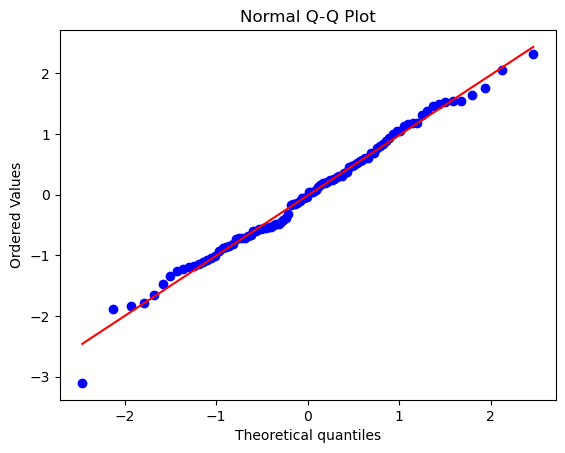

In [26]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 生成正态分布数据
data = np.random.normal(0, 1, 100)

# 绘制正态 Q-Q 图
stats.probplot(data, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()